In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# data advertising vs sales
# https://www.displayr.com/what-is-linear-regression/

df = pd.DataFrame({
    'sales': [1, 651, 762, 856, 1063, 1190, 1298, 1421, 1440, 1518],
    'advertising': [60, 23, 26, 30, 34, 43, 48, 52, 57, 58]
})

In [3]:
# cleaning data: handle outlier, handle null, unimportant features
df

,sales,advertising
0,1,60
1,651,23
2,762,26
3,856,30
4,1063,34
5,1190,43
6,1298,48
7,1421,52
8,1440,57
9,1518,58


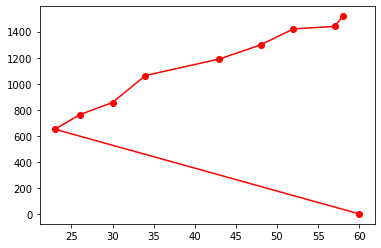

In [4]:
plt.plot(df['advertising'], df['sales'], 'r-o')
plt.show()

In [5]:
# Check outlier = IQR, Z-score, Boxplot

In [6]:
sales = df['sales'].values
sales = np.sort(sales)

print(sales)
print(np.percentile(sales, 25))
print(np.median(sales))
print(np.percentile(sales, 50))
print(np.percentile(sales, 75))

[   1  651  762  856 1063 1190 1298 1421 1440 1518]
785.5
1126.5
1126.5
1390.25


In [7]:
q1, q2, q3 = df['sales'].quantile([0.25, 0.5, 0.75]).values
# q1, q2, q3
iqr = q3 - q1
outhi = q3 + 1.5 * iqr
outlo = q1 - 1.5 * iqr
outhi, outlo

(2297.375, -121.625)

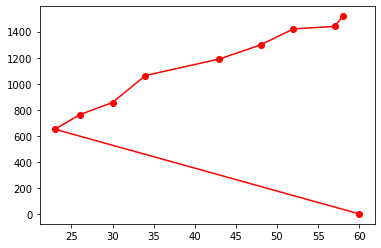

In [8]:
plt.plot(df['advertising'], df['sales'], 'r-o')
plt.show()

In [9]:
# df = df.drop(index=[0])
# df

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression()

In [12]:
# model.fit(x independentVar 2d, y target dependent 1d)
model.fit(df[['advertising']], df['sales'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
# y = mx + c
df['salesPred1'] = model.coef_[0] * df['advertising'] + model.intercept_
df['salesPred2'] = model.predict(df[['advertising']])
df

,sales,advertising,salesPred1,salesPred2
0,1,60,1159.993903,1159.993903
1,651,23,853.498376,853.498376
2,762,26,878.349365,878.349365
3,856,30,911.484016,911.484016
4,1063,34,944.618668,944.618668
5,1190,43,1019.171634,1019.171634
6,1298,48,1060.589948,1060.589948
7,1421,52,1093.724600,1093.724600
8,1440,57,1135.142914,1135.142914
9,1518,58,1143.426577,1143.426577


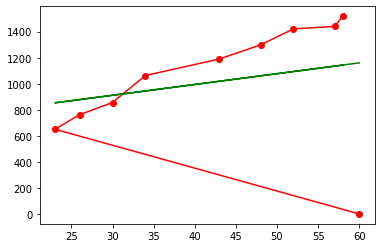

In [14]:
plt.plot(df['advertising'], df['sales'], 'r-o')
plt.plot(df['advertising'], df['salesPred2'], 'g-')
plt.show()

In [15]:
# sales = 3000, advertising = ???
model.predict([[100]])

array([1491.34041826])

In [16]:
# sales = 3000, advertising = ???
# y = mx + c
# 3000 = mx + c
# (3000 - c) / m = x

x = (3000 - model.intercept_) / model.coef_
x[0]

282.12469560432015

<hr>

# Multivariate Linear Regression

X features > 1

Dataset: [kaggle.com/karthickveerakumar/startup-logistic-regression](https://www.kaggle.com/karthickveerakumar/startup-logistic-regression)

In [17]:
df = pd.read_csv('50_Startups.csv')
df.head()
# Sementara feature 'State' diabaikan krn String!

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [18]:
# df.describe()
# df.info()
# df.isnull()
# df.isnull().sum()

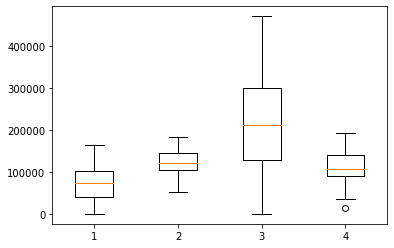

In [19]:
plt.boxplot([
    df['R&D Spend'], df['Administration'], df['Marketing Spend'],
    df['Profit']
])
plt.show()

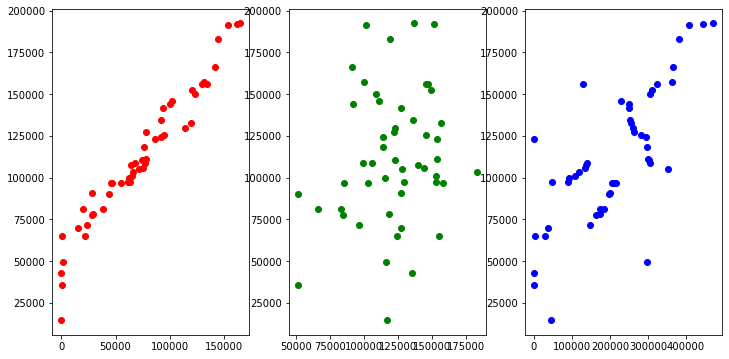

In [20]:
# cek kaitan 3 features x thd feature y
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.plot(df['R&D Spend'], df['Profit'], 'ro')
plt.subplot(132)
plt.plot(df['Administration'], df['Profit'], 'go')
plt.subplot(133)
plt.plot(df['Marketing Spend'], df['Profit'], 'bo')
plt.show()

In [21]:
# cek korelasi dan kovarian
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [22]:
df.cov()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,2.107017e+09,3.111739e+08,4.065495e+09,1.800007e+09
Administration,3.111739e+08,7.849973e+08,-1.101690e+08,2.266673e+08
Marketing Spend,4.065495e+09,-1.101690e+08,1.495492e+10,3.685779e+09
Profit,1.800007e+09,2.266673e+08,3.685779e+09,1.624588e+09


#### Multiple variable OLS

$$y = m_1 x_1 + m_2 x_2 + ... + m_n x_n + c$$

In [23]:
model = LinearRegression()

In [24]:
# training dg 2x & 1y
model.fit(df[['R&D Spend', 'Marketing Spend']], df['Profit'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
model.coef_

array([0.79658404, 0.02990788])

In [26]:
model.intercept_

46975.86422071999

In [27]:
# y = m1x1 + m2x2 + c => x1 = 1 & x2 = 1
print(model.predict([[1, 1]])[0])
print(model.coef_[0]*1 + model.coef_[1]*1 + model.intercept_)

46976.69071263925
46976.69071263925


In [28]:
df['ProfitPred'] = model.predict(df[['R&D Spend', 'Marketing Spend']])
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,ProfitPred
0,165349.20,136897.80,471784.10,New York,192261.83,192800.458625
1,162597.70,151377.59,443898.53,California,191792.06,189774.659480
2,153441.51,101145.55,407934.54,Florida,191050.39,181405.378097
3,144372.41,118671.85,383199.62,New York,182901.99,173441.308842
4,142107.34,91391.77,366168.42,Florida,166187.94,171127.623218


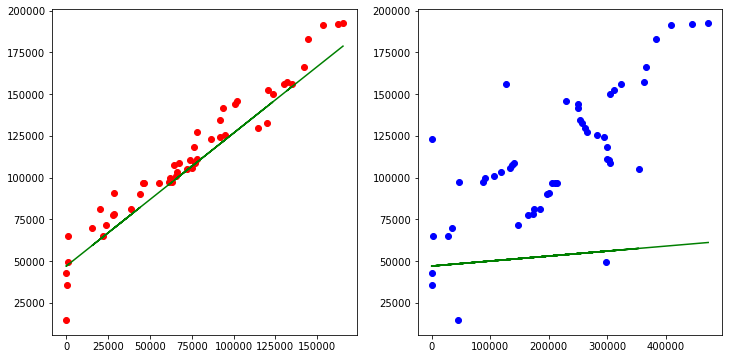

In [29]:
# best fit line utk setiap feature x
# y = mx + c
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(df['R&D Spend'], df['Profit'], 'ro')
plt.plot(df['R&D Spend'], model.coef_[0]*df['R&D Spend']+model.intercept_, 'g-')
plt.subplot(122)
plt.plot(df['Marketing Spend'], df['Profit'], 'bo')
plt.plot(df['Marketing Spend'], model.coef_[1]*df['Marketing Spend']+model.intercept_, 'g-')
plt.show()

In [30]:
# startup profit = 200000, berapa R&D & Marketing?
# y = m1x1 + m2x2 + c
# 200000 = m1x1 + m2x2 + c
# 200000 - c = m1x1 + m2x2

m1 = model.coef_[0]
m2 = model.coef_[1]
c = model.intercept_

In [31]:
model.predict([[193000, 0]])

array([200716.58472353])

## Exercise 

Try: https://www.kaggle.com/egebozoglu/house-price-linear-regression

In [68]:
df2 = pd.read_csv('housePractice.csv')
df2.drop(columns = ['id','date','zipcode','lat','long'], inplace = True)
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [69]:
kolom = list(df2.columns)
kolom.remove('price')
datasqft = []
dataother = []
datayear = []
for i in kolom:
    if 'sqft_' in i:
        datasqft.append(df2[i])
    elif 'yr_' in i :
        datayear.append(df2[i])
    else:
        dataother.append(df2[i])


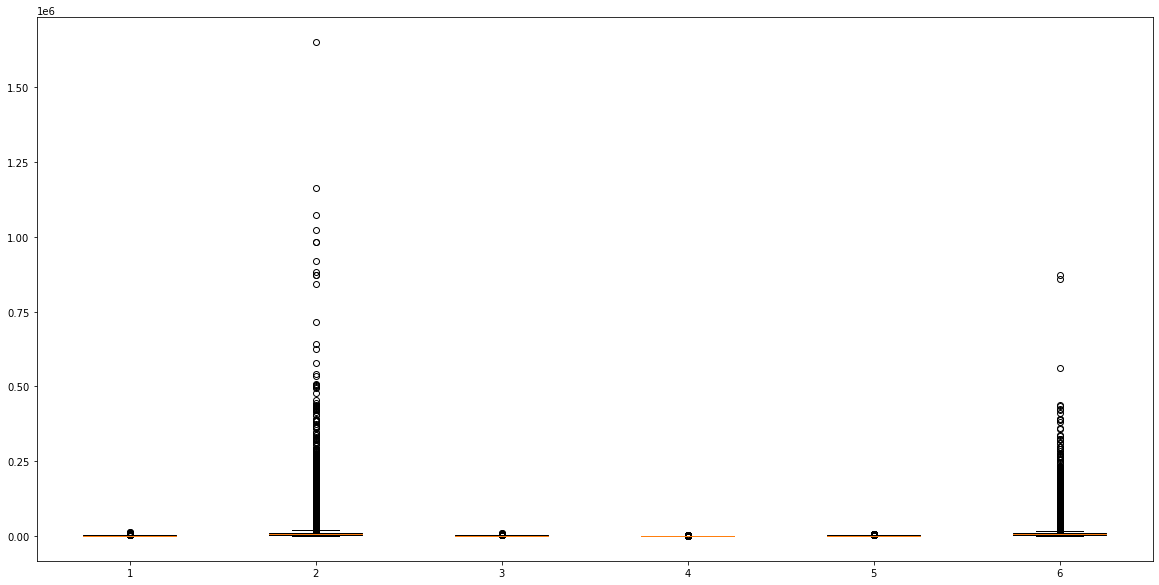

In [74]:
plt.figure(figsize = (20,10))
plt.boxplot(datasqft)
plt.show()

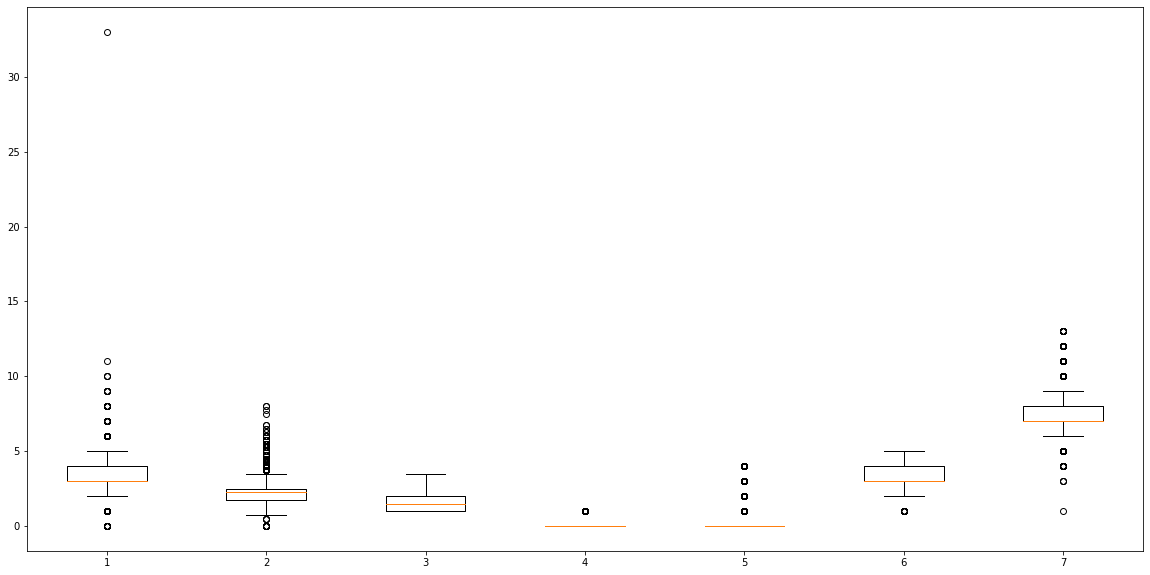

In [71]:
plt.figure(figsize = (20,10))
plt.boxplot(dataother)
plt.show()

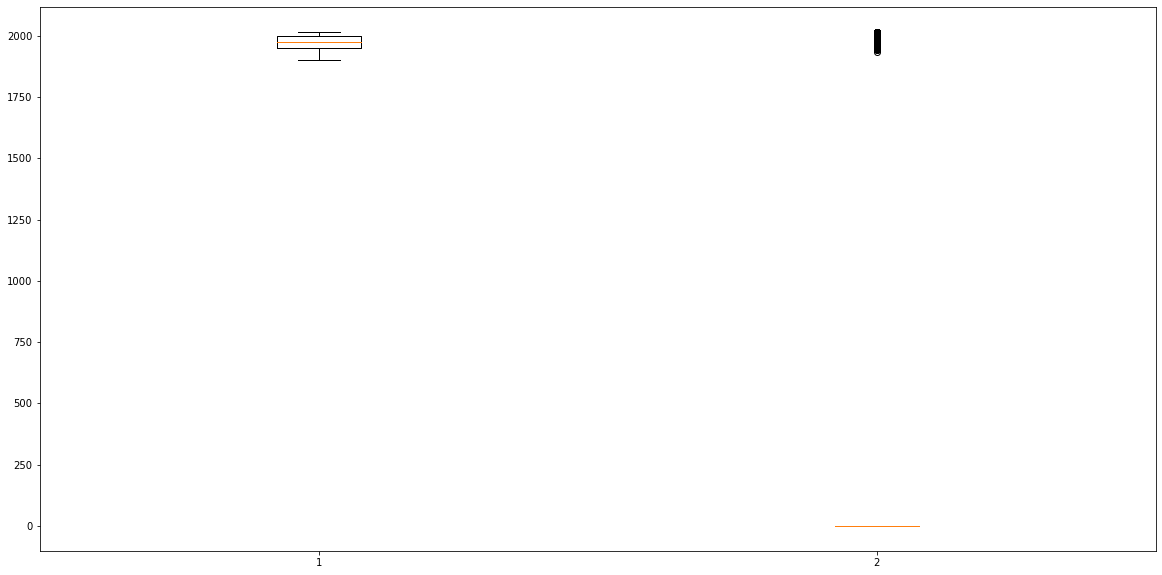

In [72]:
plt.figure(figsize = (20,10))
plt.boxplot(datayear)
plt.show()